In [208]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import datetime as dt

In [209]:
try:
    df = pd.read_csv(r"C:\Users\mitch\OneDrive\Documenten\Studie Toegepaste wiskunde\Moduleren project\GBS_MOD_12082024.csv", sep = ';')
except:
    df = pd.read_csv(r"C:\Users\Chong\Desktop\Modelleren project\info\GBS_MOD_12082024.csv", sep = ';')
    

In [210]:
#df = pd.read_csv(r"C:\Users\Chong\Desktop\Modelleren project\info\GBS_MOD_12082024.csv", sep = ';')

In [211]:
df

,Patientcode,Age,Sex,MRC_sum_e,MRC_sum_w1,CNI_e,CNI_Bulbar_e,CNI_Facial_e,CNI_Oculomotor_e,CNI_w1,...,Comorbidity_respiration,Days_between_onset_and_admission,Date_onset_weakness,Continent,Country_of_inclusion,Surv_days,Surv_status,Surv_unable_to_walk,Walking_again,Deceased
0,P0001,75.0,0,50.0,53.0,1.0,0.0,0.0,1.0,1.0,...,0.0,5.0,16-6-2016,1,5,125.0,1.0,1,1.0,0
1,P0002,22.0,0,50.0,46.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,22-11-2017,5,19,49.0,1.0,1,1.0,0
2,P0003,63.0,0,40.0,53.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15.0,28-12-2020,2,11,752.0,0.0,1,NaN,0
3,P0004,30.0,1,60.0,59.0,1.0,1.0,1.0,1.0,1.0,...,0.0,10.0,30-3-2020,1,6,13.0,1.0,1,1.0,0
4,P0005,48.0,1,39.0,45.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,28-12-2015,1,2,14.0,0.0,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,P1496,52.0,1,19.0,NaN,0.0,0.0,0.0,0.0,NaN,...,0.0,12.0,4-9-2016,1,5,26.0,0.0,1,NaN,0
1496,P1497,66.0,0,54.0,55.0,1.0,1.0,1.0,0.0,0.0,...,0.0,9.0,4-2-2017,1,1,30.0,1.0,1,1.0,0
1497,P1498,67.0,0,33.0,46.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,30-4-2017,6,21,42.0,1.0,1,1.0,0
1498,P1499,35.0,1,1.0,3.0,1.0,1.0,0.0,0.0,1.0,...,0.0,5.0,3-10-2017,3,13,280.0,1.0,1,1.0,0


In [212]:
# df.columns

In [213]:
# a =  df[['Surv_status', 'Deceased']]

In [214]:
# df.dtypes

In [215]:

# past de datum naar yyyy-mm-dd
# dan selecteer dan mm om de correlatie te bepalen met andere data
df['date_hospital'] = pd.to_datetime(df['Date_onset_weakness'], format = "%d-%m-%Y")
df['date_month'] = df['date_hospital'].dt.month

In [216]:
df = df.drop(columns = ['Patientcode','Date_onset_weakness'])
df['CSF_protein_level'] = df['CSF_protein_level'].str.replace(',','.').astype(float)

#df['Walking_again'] = df['Walking_again'].fillna(0)


In [217]:

corr_matrix = df.corr()
sorted_corr = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).unstack().sort_values(ascending=False)
sorted_corr

Country_of_inclusion  Continent                0.912135
MRC_sum_w1            MRC_sum_e                0.813435
Surv_unable_to_walk   GBSDS_e                  0.766703
GBSDS_w1              GBSDS_e                  0.762471
CNI_Oculomotor_w1     CNI_Oculomotor_e         0.758196
                                                 ...   
date_month            Ant_event_respiratory         NaN
                      Ant_event_vaccination         NaN
                      Ant_event_other               NaN
                      Walking_again                 NaN
                      date_month                    NaN
Length: 1369, dtype: float64

In [218]:
a = df.corr()['date_month'].sort_values(ascending=False)
print(a)


date_month                          1.000000
Country_of_inclusion                0.042215
Continent                           0.042008
CSF_protein_level                   0.034668
Deceased                            0.032537
Comorbidity_respiration             0.028531
GBSDS_w1                            0.027320
Sens_deficits_e                     0.024639
date_hospital                       0.016433
Able_to_walk_e                      0.014984
Surv_status                         0.009699
GBSDS_e                             0.007570
Sens_deficits_w1                    0.004381
Pain_e                              0.003648
Days_between_onset_and_admission    0.000450
Pain_w1                             0.000274
CNI_Bulbar_w1                      -0.000925
CNI_Bulbar_e                       -0.005650
Surv_unable_to_walk                -0.007161
Surv_days                          -0.012387
Able_to_walk_w1                    -0.013766
CNI_e                              -0.017687
CNI_Facial

In [219]:
df['Continent'].value_counts()

Continent
1    878
2    178
5    176
4    164
3     71
6     33
Name: count, dtype: int64

In [220]:
df['Country_of_inclusion'].value_counts(sort=True)

Country_of_inclusion
1     196
19    176
11    161
6     160
5     130
2     129
7     102
18     66
15     63
3      60
13     51
8      40
10     34
17     28
21     25
4      18
12     17
14     16
9      16
16      6
20      6
Name: count, dtype: int64

<Axes: xlabel='Country_of_inclusion', ylabel='count'>

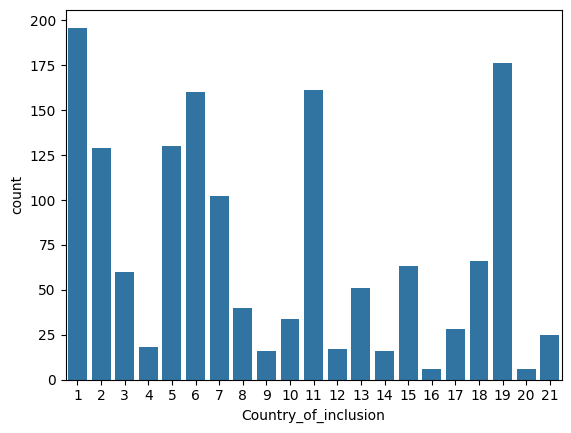

In [221]:
# sns.countplot(df,x='Continent')
sns.countplot(data  =df,x='Country_of_inclusion')

In [222]:
data = {
    'country_code': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    'country_name': ['Nederland', 'Verenigd Koninkrijk', 'Duitsland', 'België', 'Denemarken', 
                     'Italië', 'Spanje', 'Frankrijk', 'Griekenland', 'Zwitserland', 
                     'Verenigde Staten', 'Canada', 'Argentinië', 'Brazilië', 'Japan', 
                     'Taiwan', 'Maleisië', 'China', 'Bangladesh', 'Australië', 'Zuid-Afrika']
}


df_klimaat = pd.DataFrame(data)

climate_data = {
    'A_Klimaat': ['Maleisië', 'Bangladesh', 'Brazilië'],
    'B_Klimaat': ['Spanje'],
    'C_Klimaat': ['Nederland', 'Verenigd Koninkrijk', 'België', 'Denemarken', 'Duitsland', 'Frankrijk', 'Italië', 'Griekenland', 'Zwitserland', 'Argentinië', 'Japan', 'Taiwan', 'China', 'Australië', 'Zuid-Afrika'],
    'D_Klimaat': ['Verenigde Staten', 'Canada']
}

# Function to assign the climate category based on the country
def assign_climate(country):
    if country in climate_data['A_Klimaat']:
        return 'A Klimaat'
    elif country in climate_data['B_Klimaat']:
        return 'B Klimaat'
    elif country in climate_data['C_Klimaat']:
        return 'C Klimaat'
    elif country in climate_data['D_Klimaat']:
        return 'D Klimaat'
    else:
        return 'Unknown'

# Add a new column 'Climate' to the dataframe
df_klimaat['klimaat'] = df_klimaat['country_name'].apply(assign_climate)


print(df_klimaat)


    country_code         country_name    klimaat
0              1            Nederland  C Klimaat
1              2  Verenigd Koninkrijk  C Klimaat
2              3            Duitsland  C Klimaat
3              4               België  C Klimaat
4              5           Denemarken  C Klimaat
5              6               Italië  C Klimaat
6              7               Spanje  B Klimaat
7              8            Frankrijk  C Klimaat
8              9          Griekenland  C Klimaat
9             10          Zwitserland  C Klimaat
10            11     Verenigde Staten  D Klimaat
11            12               Canada  D Klimaat
12            13           Argentinië  C Klimaat
13            14             Brazilië  A Klimaat
14            15                Japan  C Klimaat
15            16               Taiwan  C Klimaat
16            17             Maleisië  A Klimaat
17            18                China  C Klimaat
18            19           Bangladesh  A Klimaat
19            20    

In [223]:
# df en df_klimaat joinen op elkaar
df = pd.merge(df, df_klimaat, 
                     left_on='Country_of_inclusion', right_on='country_code',
                     how = 'left')

df = df.drop(columns = 'country_code')

<Axes: xlabel='klimaat', ylabel='count'>

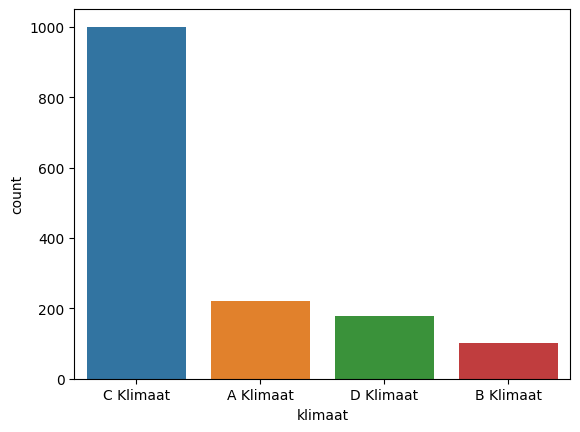

In [224]:

sns.countplot(data = df,x='klimaat', hue = 'klimaat')

In [225]:
df['klimaat'].value_counts()

klimaat
C Klimaat    1000
A Klimaat     220
D Klimaat     178
B Klimaat     102
Name: count, dtype: int64

<Axes: xlabel='halfrond', ylabel='count'>

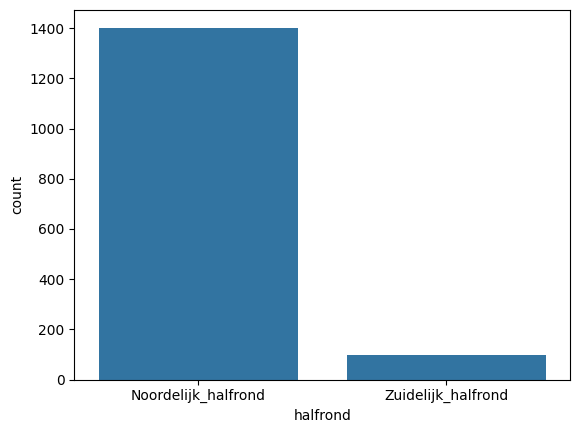

In [226]:
halfrond_data = {
    'Noordelijk_halfrond': ['Nederland', 'Verenigd Koninkrijk', 'Duitsland', 'België', 'Denemarken', 
                     'Italië', 'Spanje', 'Frankrijk', 'Griekenland', 'Zwitserland', 
                     'Verenigde Staten', 'Canada','Japan', 
                     'Taiwan', 'Maleisië', 'China', 'Bangladesh'],

    'Zuidelijk_halfrond': ['Argentinië','Brazilië','Australië', 'Zuid-Afrika']
}


def assign_halfrond(country):
    if country in halfrond_data['Noordelijk_halfrond']:
        return 'Noordelijk_halfrond'
    elif country in halfrond_data['Zuidelijk_halfrond']:
        return 'Zuidelijk_halfrond'


df['halfrond'] = df['country_name'].apply(assign_halfrond)


sns.countplot(data = df, x='halfrond')

Seizoenen definieren opbasis van de halfrond.

Noordelijk_halfrond: lente 3-5, zomer 6-8, herfst 9-11, winter 12-2

Zuidelijk halfrond: lente 9-11, zomer 12-2, herfst 3-5, winter 6-8

In [227]:
def seizoenen(halfrond, date_month):
    seizoen1 = [12,1,2]
    seizoen2 = [3,4,5]
    seizoen3 = [6,7,8]
    seizoen4 = [9,10,11]
    if str(halfrond) == 'Noordelijk_halfrond':
        if date_month in seizoen1:
            return "Winter"
        elif date_month in seizoen2:
            return "Lente"
        elif date_month in seizoen3:
            return "Zomer"
        elif date_month in seizoen4:
            return "Herfst"
        else:
            return None
    elif str(halfrond) == 'Zuidelijk_halfrond':
        if date_month in seizoen1:
            return "Zomer"
        elif date_month in seizoen2:
            return "Herfst"
        elif date_month in seizoen3:
            return "Winter"
        elif date_month in seizoen4:
            return "Lente"
        else:
            return None
    else:
        print("help")
    



In [228]:
df['halfrond'].dtype

dtype('O')

In [229]:
df['Seizoen'] = df.apply(lambda row: seizoenen(row['halfrond'], row['date_month']), axis=1)

In [230]:
# a = df[['country_name','date_month','Seizoen']]
# print(a)

<Axes: xlabel='Seizoen', ylabel='count'>

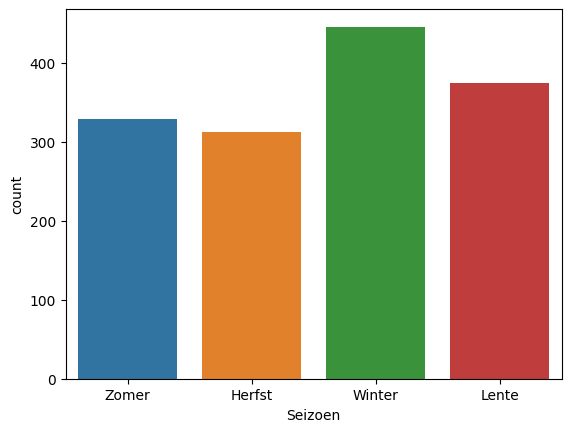

In [231]:
sns.countplot(data = df,x='Seizoen', hue = 'Seizoen', legend= False)

In [232]:
Klimaat_Seizoen = pd.crosstab(df['klimaat'], df['Seizoen'])

stats.chi2_contingency(Klimaat_Seizoen)

Chi2ContingencyResult(statistic=3.7451420362510364, pvalue=0.9273719105102436, dof=9, expected_freq=array([[ 46.85372522,  56.13465482,  66.76281613,  49.24880383],
       [ 21.18045113,  25.37593985,  30.18045113,  22.26315789],
       [208.38140807, 249.6582365 , 296.92686261, 219.03349282],
       [ 36.58441558,  43.83116883,  52.12987013,  38.45454545]]))

De chi-kwadraat toets geeft een p-waarde van 0,9237.... dat is hoger dan 0,05. Dus de 0-hypothese wordt bewaard.
De 0 hypothese is dat de 2 variabelen statistisch onafhankelijk zijn.

Eerst kijken hoeveel NA er zijn in de dataset. Om te bepalen welke vorm van NA-handling wordt toegepast

In [233]:
for column, dtype in zip(df.columns, df.isna().sum()):
    print(column, ":", dtype)

Age : 9
Sex : 0
MRC_sum_e : 50
MRC_sum_w1 : 183
CNI_e : 33
CNI_Bulbar_e : 33
CNI_Facial_e : 33
CNI_Oculomotor_e : 33
CNI_w1 : 175
CNI_Bulbar_w1 : 189
CNI_Facial_w1 : 189
CNI_Oculomotor_w1 : 189
Pain_e : 35
Pain_w1 : 171
Sens_deficits_e : 40
Sens_deficits_w1 : 182
Ant_event : 98
Ant_event_GE : 1105
Ant_event_respiratory : 917
Ant_event_vaccination : 1464
Ant_event_other : 1429
GBSDS_e : 40
Able_to_walk_e : 40
GBSDS_w1 : 178
Able_to_walk_w1 : 178
CSF_protein_level : 180
Comorbidity_respiration : 32
Days_between_onset_and_admission : 40
Continent : 0
Country_of_inclusion : 0
Surv_days : 367
Surv_status : 363
Surv_unable_to_walk : 0
Walking_again : 606
Deceased : 0
date_hospital : 37
date_month : 37
country_name : 0
klimaat : 0
halfrond : 0
Seizoen : 37


In [234]:
df = df.dropna(thresh= df.shape[1]-10)
df

,Age,Sex,MRC_sum_e,MRC_sum_w1,CNI_e,CNI_Bulbar_e,CNI_Facial_e,CNI_Oculomotor_e,CNI_w1,CNI_Bulbar_w1,...,Surv_status,Surv_unable_to_walk,Walking_again,Deceased,date_hospital,date_month,country_name,klimaat,halfrond,Seizoen
0,75.0,0,50.0,53.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1,1.0,0,2016-06-16,6.0,Denemarken,C Klimaat,Noordelijk_halfrond,Zomer
1,22.0,0,50.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1,1.0,0,2017-11-22,11.0,Bangladesh,A Klimaat,Noordelijk_halfrond,Herfst
2,63.0,0,40.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,NaN,0,2020-12-28,12.0,Verenigde Staten,D Klimaat,Noordelijk_halfrond,Winter
3,30.0,1,60.0,59.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1,1.0,0,2020-03-30,3.0,Italië,C Klimaat,Noordelijk_halfrond,Lente
4,48.0,1,39.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1,NaN,0,2015-12-28,12.0,Verenigd Koninkrijk,C Klimaat,Noordelijk_halfrond,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,69.0,0,42.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,NaN,0,2016-02-12,2.0,Taiwan,C Klimaat,Noordelijk_halfrond,Winter
1496,66.0,0,54.0,55.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,1,1.0,0,2017-02-04,2.0,Nederland,C Klimaat,Noordelijk_halfrond,Winter
1497,67.0,0,33.0,46.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1,1.0,0,2017-04-30,4.0,Zuid-Afrika,C Klimaat,Zuidelijk_halfrond,Herfst
1498,35.0,1,1.0,3.0,1.0,1.0,0.0,0.0,1.0,1.0,...,1.0,1,1.0,0,2017-10-03,10.0,Argentinië,C Klimaat,Zuidelijk_halfrond,Lente


In [235]:
for column, dtype in zip(df.columns, df.isna().sum()):
    print(column, ":", dtype)

Age : 3
Sex : 0
MRC_sum_e : 16
MRC_sum_w1 : 12
CNI_e : 0
CNI_Bulbar_e : 0
CNI_Facial_e : 0
CNI_Oculomotor_e : 0
CNI_w1 : 4
CNI_Bulbar_w1 : 18
CNI_Facial_w1 : 18
CNI_Oculomotor_w1 : 18
Pain_e : 4
Pain_w1 : 3
Sens_deficits_e : 8
Sens_deficits_w1 : 11
Ant_event : 83
Ant_event_GE : 967
Ant_event_respiratory : 813
Ant_event_vaccination : 1297
Ant_event_other : 1259
GBSDS_e : 8
Able_to_walk_e : 8
GBSDS_w1 : 10
Able_to_walk_w1 : 10
CSF_protein_level : 154
Comorbidity_respiration : 4
Days_between_onset_and_admission : 7
Continent : 0
Country_of_inclusion : 0
Surv_days : 276
Surv_status : 287
Surv_unable_to_walk : 0
Walking_again : 480
Deceased : 0
date_hospital : 7
date_month : 7
country_name : 0
klimaat : 0
halfrond : 0
Seizoen : 7


In [236]:
df[df['Ant_event'].isna() == False]['Ant_event'].count()

1242

In [237]:
df[df['Ant_event_GE'].isna() == False]['Ant_event_GE'].count()

358

In [238]:
df['Ant_event_GE']

0       1.0
1       NaN
2       NaN
3       NaN
4       1.0
       ... 
1494    NaN
1496    NaN
1497    NaN
1498    NaN
1499    NaN
Name: Ant_event_GE, Length: 1325, dtype: float64

In [239]:
df['Ant_event'].value_counts()

Ant_event
1.0    950
0.0    292
Name: count, dtype: int64

In [240]:
df['Ant_event_GE'].isna().sum()

967

In [241]:
df['Ant_event_GE'].value_counts()

Ant_event_GE
1.0    358
Name: count, dtype: int64

In [242]:
df['Ant_event_GE'] = df['Ant_event_GE'].fillna(df['Ant_event'].
                                               where(df['Ant_event'] <2, other=pd.NA).replace(1, 0))

In [243]:
df['Ant_event_GE'].isna().sum()

83

In [244]:
df['Ant_event_GE'].value_counts()


Ant_event_GE
0.0    884
1.0    358
Name: count, dtype: int64

In [245]:
df['Ant_event_respiratory'] = df['Ant_event_respiratory'].fillna(df['Ant_event'].
                                               where(df['Ant_event'] <2, other=pd.NA).replace(1, 0))

In [246]:
df['Ant_event_vaccination'] = df['Ant_event_vaccination'].fillna(df['Ant_event'].
                                               where(df['Ant_event'] <2, other=pd.NA).replace(1, 0))

In [247]:
df['Ant_event_other'] = df['Ant_event_other'].fillna(df['Ant_event'].
                                               where(df['Ant_event'] <2, other=pd.NA).replace(1, 0))

In [248]:
for column, dtype in zip(df.columns, df.isna().sum()):
    print(column, ":", dtype)

Age : 3
Sex : 0
MRC_sum_e : 16
MRC_sum_w1 : 12
CNI_e : 0
CNI_Bulbar_e : 0
CNI_Facial_e : 0
CNI_Oculomotor_e : 0
CNI_w1 : 4
CNI_Bulbar_w1 : 18
CNI_Facial_w1 : 18
CNI_Oculomotor_w1 : 18
Pain_e : 4
Pain_w1 : 3
Sens_deficits_e : 8
Sens_deficits_w1 : 11
Ant_event : 83
Ant_event_GE : 83
Ant_event_respiratory : 83
Ant_event_vaccination : 83
Ant_event_other : 83
GBSDS_e : 8
Able_to_walk_e : 8
GBSDS_w1 : 10
Able_to_walk_w1 : 10
CSF_protein_level : 154
Comorbidity_respiration : 4
Days_between_onset_and_admission : 7
Continent : 0
Country_of_inclusion : 0
Surv_days : 276
Surv_status : 287
Surv_unable_to_walk : 0
Walking_again : 480
Deceased : 0
date_hospital : 7
date_month : 7
country_name : 0
klimaat : 0
halfrond : 0
Seizoen : 7


In [249]:
df_2  = df[['Able_to_walk_e','Able_to_walk_w1','Surv_unable_to_walk','Walking_again']]

In [250]:
df_2

,Able_to_walk_e,Able_to_walk_w1,Surv_unable_to_walk,Walking_again
0,0.0,0.0,1,1.0
1,0.0,0.0,1,1.0
2,0.0,0.0,1,NaN
3,0.0,1.0,1,1.0
4,0.0,0.0,1,NaN
...,...,...,...,...
1494,0.0,0.0,1,NaN
1496,0.0,0.0,1,1.0
1497,0.0,0.0,1,1.0
1498,0.0,0.0,1,1.0


In [251]:
df_lopers = df_2[df_2['Surv_unable_to_walk'] == 0]

In [252]:
print(df_lopers['Able_to_walk_e'].value_counts(), '\n',
    df_lopers['Able_to_walk_w1'].value_counts(), '\n',
    df_lopers['Surv_unable_to_walk'].value_counts(), '\n',
    'walking_again', df_lopers['Walking_again'].value_counts())


Able_to_walk_e
1.0    268
Name: count, dtype: int64 
 Able_to_walk_w1
1.0    268
Name: count, dtype: int64 
 Surv_unable_to_walk
0    270
Name: count, dtype: int64 
 walking_again Series([], Name: count, dtype: int64)


In [253]:
df_NietLopers = df_2[df_2['Surv_unable_to_walk'] == 1]

In [254]:
df_NietLopers

,Able_to_walk_e,Able_to_walk_w1,Surv_unable_to_walk,Walking_again
0,0.0,0.0,1,1.0
1,0.0,0.0,1,1.0
2,0.0,0.0,1,NaN
3,0.0,1.0,1,1.0
4,0.0,0.0,1,NaN
...,...,...,...,...
1494,0.0,0.0,1,NaN
1496,0.0,0.0,1,1.0
1497,0.0,0.0,1,1.0
1498,0.0,0.0,1,1.0


In [255]:
print(df['Able_to_walk_e'].value_counts(), '\n',
      df['Able_to_walk_w1'].value_counts())

Able_to_walk_e
0.0    982
1.0    335
Name: count, dtype: int64 
 Able_to_walk_w1
0.0    907
1.0    408
Name: count, dtype: int64


In [256]:
df['Able_to_walk_e'] = df['Able_to_walk_e'].fillna(df['Surv_unable_to_walk'].
                                               where(df['Surv_unable_to_walk'] == 0, other=pd.NA).replace(0, 1))

In [257]:
df['Able_to_walk_w1'] = df['Able_to_walk_w1'].fillna(df['Surv_unable_to_walk'].
                                               where(df['Surv_unable_to_walk'] == 0, other=pd.NA).replace(0, 1))

In [258]:
print(df['Able_to_walk_e'].value_counts(), '\n',
      df['Able_to_walk_w1'].value_counts())

Able_to_walk_e
0.0    982
1.0    337
Name: count, dtype: int64 
 Able_to_walk_w1
0.0    907
1.0    410
Name: count, dtype: int64


In [259]:
df['Surv_status'] = df['Surv_status'].fillna(0)

In [260]:
for column, dtype in zip(df.columns, df.isna().sum()):
    print(column, ":", dtype)

Age : 3
Sex : 0
MRC_sum_e : 16
MRC_sum_w1 : 12
CNI_e : 0
CNI_Bulbar_e : 0
CNI_Facial_e : 0
CNI_Oculomotor_e : 0
CNI_w1 : 4
CNI_Bulbar_w1 : 18
CNI_Facial_w1 : 18
CNI_Oculomotor_w1 : 18
Pain_e : 4
Pain_w1 : 3
Sens_deficits_e : 8
Sens_deficits_w1 : 11
Ant_event : 83
Ant_event_GE : 83
Ant_event_respiratory : 83
Ant_event_vaccination : 83
Ant_event_other : 83
GBSDS_e : 8
Able_to_walk_e : 6
GBSDS_w1 : 10
Able_to_walk_w1 : 8
CSF_protein_level : 154
Comorbidity_respiration : 4
Days_between_onset_and_admission : 7
Continent : 0
Country_of_inclusion : 0
Surv_days : 276
Surv_status : 0
Surv_unable_to_walk : 0
Walking_again : 480
Deceased : 0
date_hospital : 7
date_month : 7
country_name : 0
klimaat : 0
halfrond : 0
Seizoen : 7


In [261]:
freq_table = pd.crosstab(df['klimaat'], df['Seizoen']) 
freq_table

Seizoen,Herfst,Lente,Winter,Zomer
klimaat,,,,
A Klimaat,47,58,57,43
B Klimaat,20,24,27,18
C Klimaat,175,218,271,208
D Klimaat,38,33,47,34


In [262]:
df_A = df[df['klimaat'] == 'A Klimaat']
df_B = df[df['klimaat'] == 'B Klimaat']
df_C = df[df['klimaat'] == 'C Klimaat']
df_D = df[df['klimaat'] == 'D Klimaat']

In [263]:
dataframes_klimaat = [df_A, df_B, df_C, df_D]
for i in dataframes_klimaat:
    print(i['klimaat'].value_counts()) 
    

klimaat
A Klimaat    206
Name: count, dtype: int64
klimaat
B Klimaat    90
Name: count, dtype: int64
klimaat
C Klimaat    875
Name: count, dtype: int64
klimaat
D Klimaat    154
Name: count, dtype: int64


Uit deze code is te zien dat alle klimaten op juiste wijze zijn gesplitst

In [264]:
df_lente = df[df['Seizoen'] == 'Lente']
df_zomer = df[df['Seizoen'] == 'Zomer']
df_herfst = df[df['Seizoen'] == 'Herfst']
df_winter = df[df['Seizoen'] == 'Winter']

In [265]:
dataframes_seizoen = [df_lente, df_zomer, df_herfst, df_winter]
for i in dataframes_seizoen:
    print(i['Seizoen'].value_counts()) 
    

Seizoen
Lente    333
Name: count, dtype: int64
Seizoen
Zomer    303
Name: count, dtype: int64
Seizoen
Herfst    280
Name: count, dtype: int64
Seizoen
Winter    402
Name: count, dtype: int64


In [266]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Deceased'], dateframe['Seizoen']) 
    print(freq_table, '\n')
  

Seizoen   Herfst  Lente  Winter  Zomer
Deceased                              
0             44     58      55     40
1              3      0       2      3 

Seizoen   Herfst  Lente  Winter  Zomer
Deceased                              
0             19     24      26     18
1              1      0       1      0 

Seizoen   Herfst  Lente  Winter  Zomer
Deceased                              
0            168    208     261    200
1              7     10      10      8 

Seizoen   Herfst  Lente  Winter  Zomer
Deceased                              
0             38     32      47     32
1              0      1       0      2 



Wat in deze tabel is te zien dat er te weinig waarden apart zijn om de chi-kwadraat toets uit te voeren, daarom wordt voor het geheel de chi-kwadraat en voor C klimaat de test uitgevoerd. Omdat dit geen 2 bij 2 matrices zijn mag de fishers exact toets ook niet worden uitgevoerd

In [267]:
Seizoen_dood = pd.crosstab(df['Seizoen'], df['Deceased'])
stats.chi2_contingency(Seizoen_dood)

Chi2ContingencyResult(statistic=0.7282704121038908, pvalue=0.8665351698920313, dof=3, expected_freq=array([[269.80273141,  10.19726859],
       [320.87253414,  12.12746586],
       [387.35963581,  14.64036419],
       [291.96509863,  11.03490137]]))

In [268]:
Seizoen_dood = pd.crosstab(df_C['Seizoen'], df_C['Deceased'])
stats.chi2_contingency(Seizoen_dood)

Chi2ContingencyResult(statistic=0.2750069819875797, pvalue=0.9646583492928525, dof=3, expected_freq=array([[167.97591743,   7.02408257],
       [209.25      ,   8.75      ],
       [260.12270642,  10.87729358],
       [199.65137615,   8.34862385]]))

In [269]:
for dateframe in dataframes_klimaat:
    freq_table = pd.crosstab(dateframe['Surv_status'], dateframe['Seizoen']) 
    print(freq_table, '\n')

Seizoen      Herfst  Lente  Winter  Zomer
Surv_status                              
0.0              11     15      13     11
1.0              33     43      42     29
2.0               3      0       2      3 

Seizoen      Herfst  Lente  Winter  Zomer
Surv_status                              
0.0               7     11       7     10
1.0              12     13      19      8
2.0               1      0       1      0 

Seizoen      Herfst  Lente  Winter  Zomer
Surv_status                              
0.0              52     73      90     81
1.0             116    135     171    119
2.0               7     10      10      8 

Seizoen      Herfst  Lente  Winter  Zomer
Surv_status                              
0.0              14     15      15      5
1.0              24     17      32     27
2.0               0      1       0      2 



Voor de surv_status geldt hetzelfde al voor deceaced

In [270]:
Seizoen_surv_status = pd.crosstab(df['Seizoen'], df['Surv_status'])
stats.chi2_contingency(Seizoen_surv_status)

Chi2ContingencyResult(statistic=3.6084050021635243, pvalue=0.7294954618148062, dof=6, expected_freq=array([[ 91.35053111, 178.4522003 ,  10.19726859],
       [108.64188164, 212.2306525 ,  12.12746586],
       [131.15326252, 256.20637329,  14.64036419],
       [ 98.85432473, 193.1107739 ,  11.03490137]]))

In [271]:
Seizoen_surv_status = pd.crosstab(df_C['Seizoen'], df_C['Surv_status'])
stats.chi2_contingency(Seizoen_surv_status)

Chi2ContingencyResult(statistic=4.113168019450811, pvalue=0.6613648188238734, dof=6, expected_freq=array([[ 59.40366972, 108.57224771,   7.02408257],
       [ 74.        , 135.25      ,   8.75      ],
       [ 91.99082569, 168.13188073,  10.87729358],
       [ 70.60550459, 129.04587156,   8.34862385]]))